# 0. Data Pre-Processing and EDA

Overview:
- This notebook will perform image pre-processing and EDA to ensure standard inputs to the eventual machine learning classifiers
- The process will include the following:
    - Size and Channels standardization
    - Normalization of all images
    - Ensuring all images are of the same data-type

### 0. Imports

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# replace with your own location
# cd '/content/drive/MyDrive/MIDS/DATASCI 281 Summer 2025/DATASCI 281 Group Project/datasci281_final_project (github)'

/content/drive/MyDrive/MIDS/DATASCI 281 Summer 2025/DATASCI 281 Group Project/datasci281_final_project (github)


In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2 as cv
from skimage.feature import hog
from skimage import data, exposure
from utils import *
from skimage.filters import difference_of_gaussians
from skimage.filters import laplace
from skimage.filters import gaussian


### 1. Load all images, plot shape distribution, and show example images

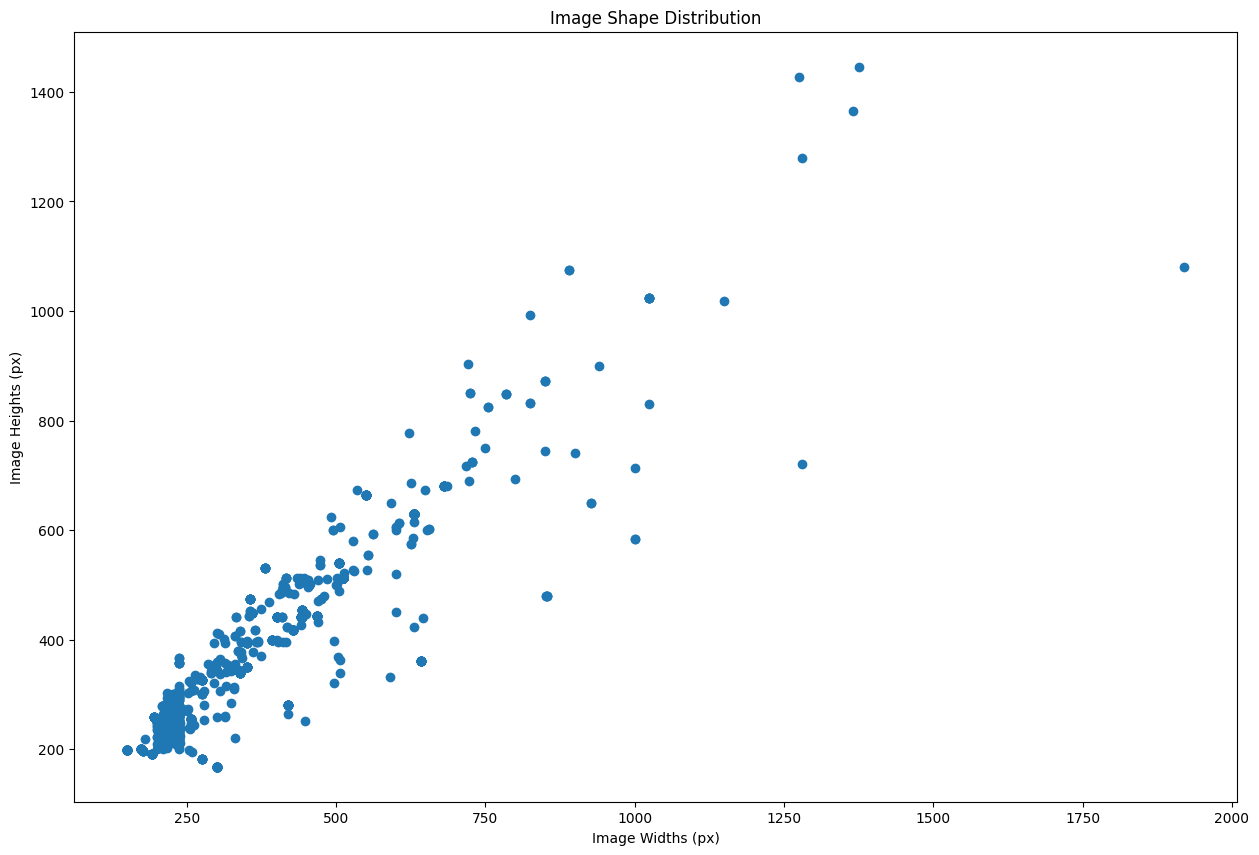

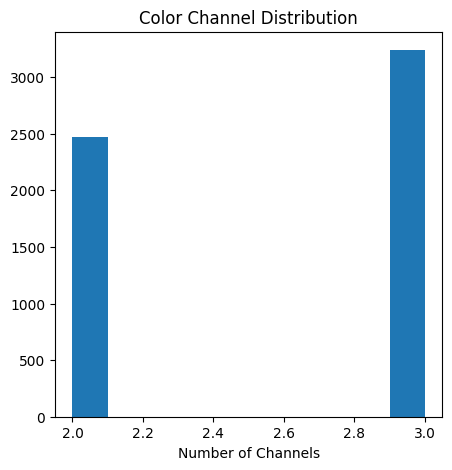

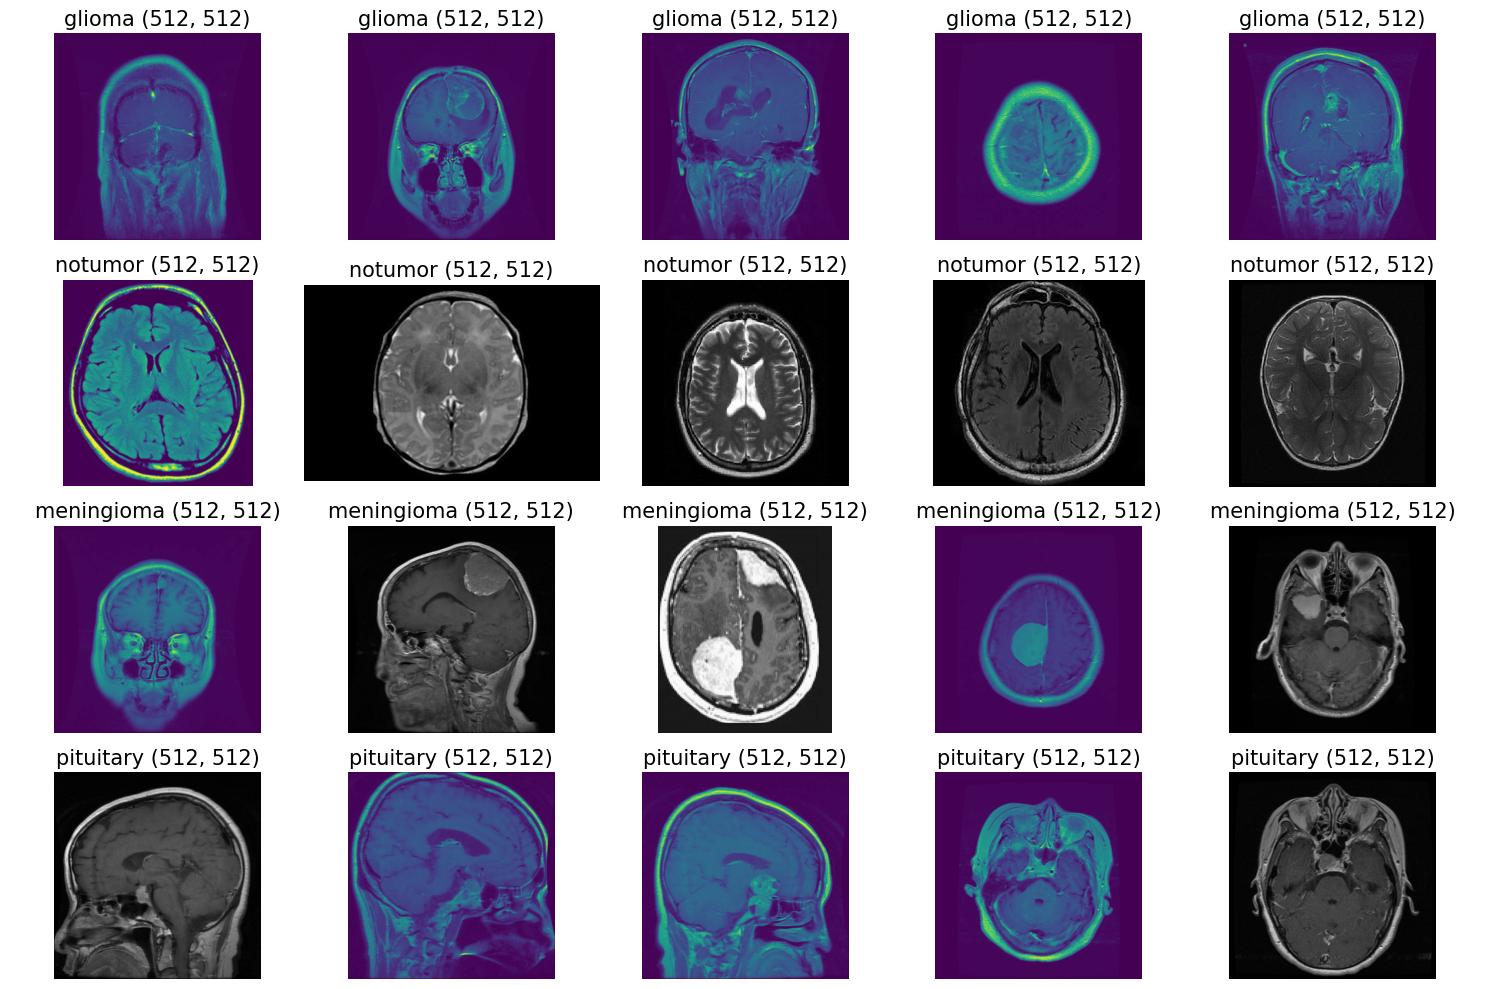

In [4]:
# Setup Data Paths
cwd = os.getcwd()
data_path = os.path.join(cwd,'data')
training_path = os.path.join(data_path,'Training')

# Initialize Data Variables
X_train = []
Y_train = []
img_shapes = []
label_names = []

# Load in Images and Labels
for label in os.listdir(training_path):
    label_names.append(label)
    label_path = os.path.join(training_path,label)
    for image in os.listdir(label_path):
        image_path = os.path.join(label_path,image)
        img_array = plt.imread(image_path)
        # img_array = cv.imread(image_path)

        # # Turn all Images to Gray Scale
        # img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
        img_shapes.append(img_array.shape)
        X_train.append(img_array)
        Y_train.append(label)

# Shuffle Data for Randomization
np.random.seed(281)
indices = [i for i in range(0,len(X_train))]
shuffle_indices = np.random.permutation(indices)
X_train_shuffled = [X_train[i] for i in shuffle_indices]
Y_train_shuffled = [Y_train[i] for i in shuffle_indices]


# Plot Distribution of Image Shapes
img_shape_widths = [img[1] for img in img_shapes]
img_shape_heights = [img[0] for img in img_shapes]
plt.figure(figsize=(15,10))
plt.scatter(img_shape_widths, img_shape_heights)
plt.title("Image Shape Distribution")
plt.xlabel("Image Widths (px)")
plt.ylabel("Image Heights (px)")
plt.show()

# Channel Distribution
channel_size = [len(shape) for shape in img_shapes]
plt.figure(figsize = (5,5))
plt.hist(channel_size)
plt.title("Color Channel Distribution")
plt.xlabel("Number of Channels")


# Plot Example Images of Each Label
plt.figure(figsize = (15,10))
plt.axis('off')
column_indexer = 0
while column_indexer < 20:
    for label in label_names:
        index_pos = [i for i, x in enumerate(Y_train_shuffled) if x == label]
        for counter in range(0,5):
            image_index_value = index_pos[counter]
            plt.subplot(4,5,column_indexer+counter+1)
            plt.title(label +' ' + str(img_shapes[image_index_value]), fontsize=15)
            plt.axis('off')
            plt.imshow(X_train_shuffled[image_index_value])
        column_indexer = column_indexer + 5
plt.tight_layout()
plt.show()


### 2. Resolution/sizing Standardization

### 3. Class Distribution

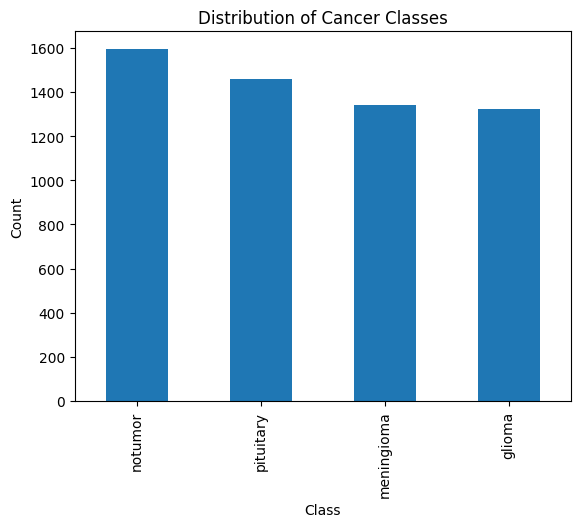

In [5]:
y_train_series = pd.Series(Y_train)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### 4. Blobs and Edges

HOG (Histogram of Gradients)

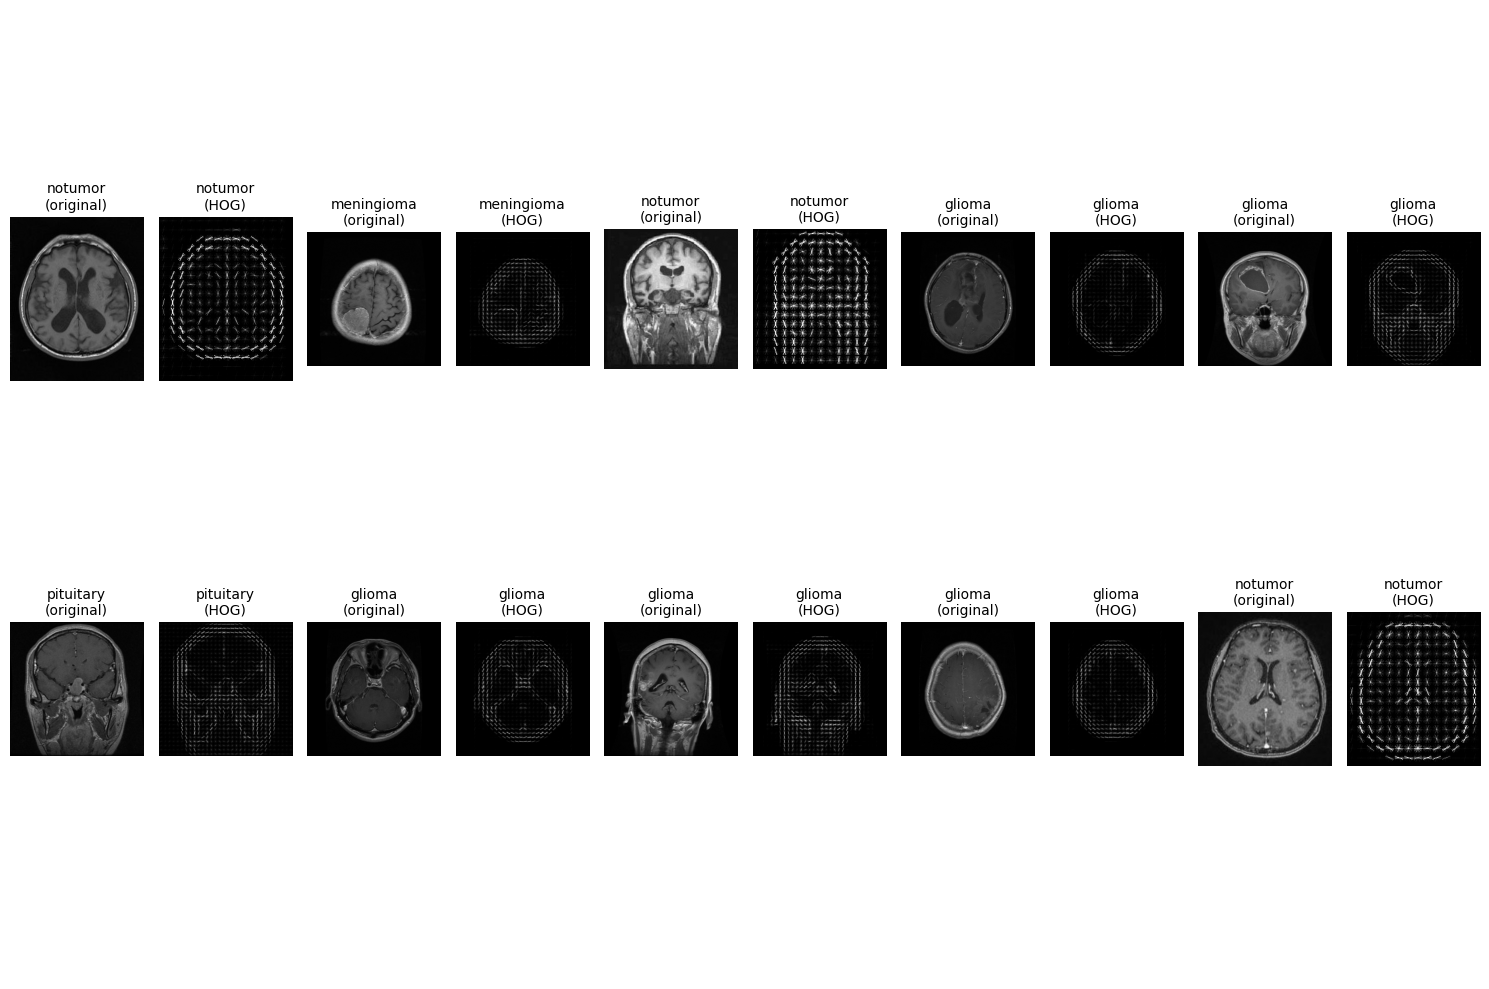

In [6]:
# Plot HOG for 10 random images
plt.figure(figsize=(15, 10))
plt.axis('off')
random_indices = np.random.choice(len(X_train), 10, replace=False)

for i, index in enumerate(random_indices):
  image = X_train[index]
  label = Y_train[index]

  # Convert to grayscale if not already
  if len(image.shape) == 3:
      image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

  fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16),
                      cells_per_block=(2, 2), visualize=True)

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  plt.subplot(2, 10, i + i + 1)
  plt.title(f'{label}\n(original)', fontsize=10)
  plt.axis('off')
  plt.imshow(image, cmap="gray")
  plt.subplot(2, 10, i + i + 2)
  plt.title(f'{label}\n(HOG)', fontsize=10)
  plt.axis('off')
  plt.imshow(hog_image_rescaled, cmap="gray")

plt.tight_layout()
plt.show()

Difference of Gaussians

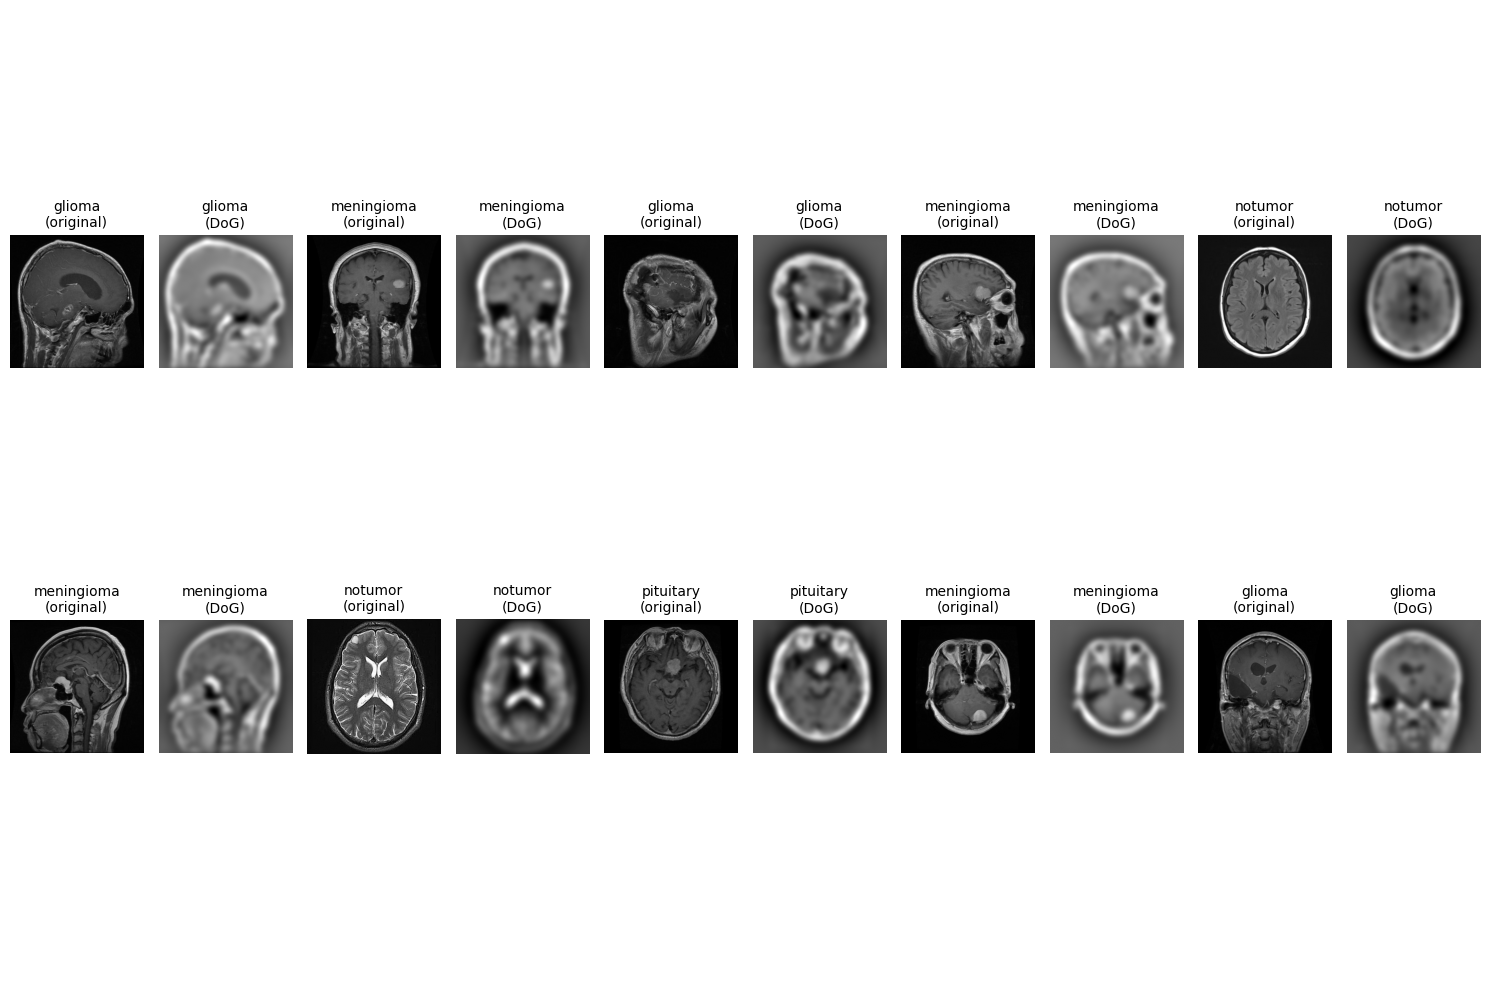

In [13]:
plt.figure(figsize=(15, 10))
plt.axis('off')
random_indices = np.random.choice(len(X_train), 10, replace=False)

for i, index in enumerate(random_indices):
  image = X_train[index]
  label = Y_train[index]

  # Convert to grayscale if not already
  if len(image.shape) == 3:
      image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

  dog_image = difference_of_gaussians(image, 10.0, 50.0)

  plt.subplot(2, 10, i + i + 1)
  plt.title(f'{label}\n(original)', fontsize=10)
  plt.axis('off')
  plt.imshow(image, cmap="gray")
  plt.subplot(2, 10, i + i + 2)
  plt.title(f'{label}\n(DoG)', fontsize=10)
  plt.axis('off')
  plt.imshow(dog_image, cmap="gray")

plt.tight_layout()
plt.show()

Laplacian of Guassian

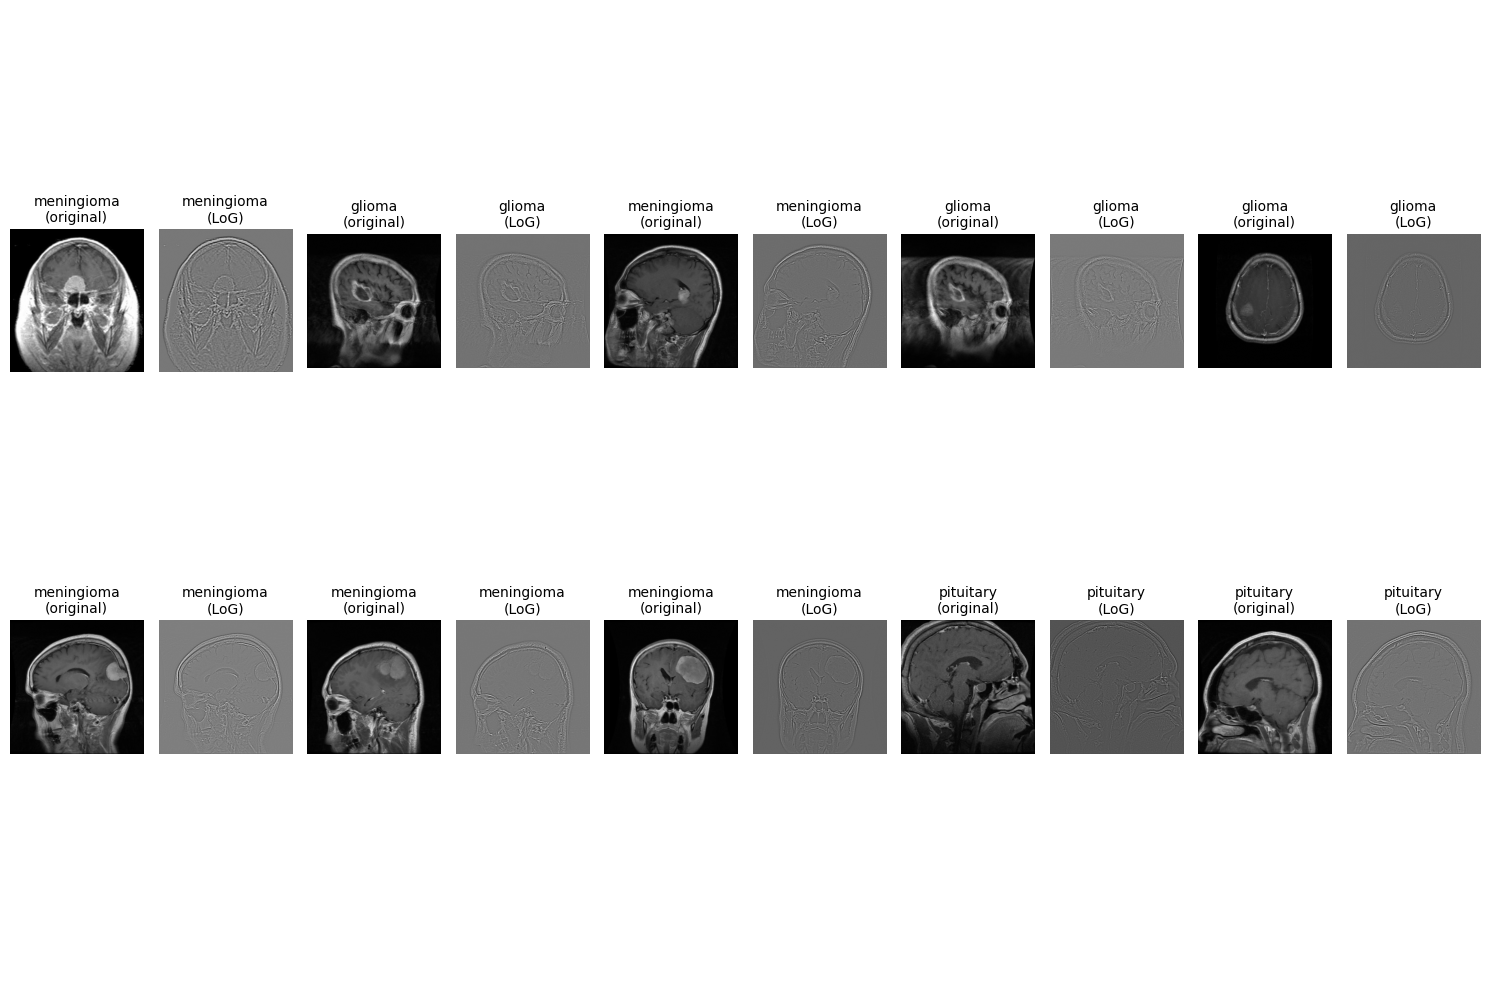

In [11]:
plt.figure(figsize=(15, 10))
plt.axis('off')
random_indices = np.random.choice(len(X_train), 10, replace=False)

for i, index in enumerate(random_indices):
  image = X_train[index]
  label = Y_train[index]

  # Convert to grayscale if not already
  if len(image.shape) == 3:
      image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

  # Apply Gaussian blur
  blurred_image = gaussian(image, sigma=1.0)

  # Apply Laplacian filter
  log_image = laplace(blurred_image)


  plt.subplot(2, 10, i + i + 1)
  plt.title(f'{label}\n(original)', fontsize=10)
  plt.axis('off')
  plt.imshow(image, cmap="gray")
  plt.subplot(2, 10, i + i + 2)
  plt.title(f'{label}\n(LoG)', fontsize=10)
  plt.axis('off')
  plt.imshow(log_image, cmap="gray")

plt.tight_layout()
plt.show()

Canny Edges

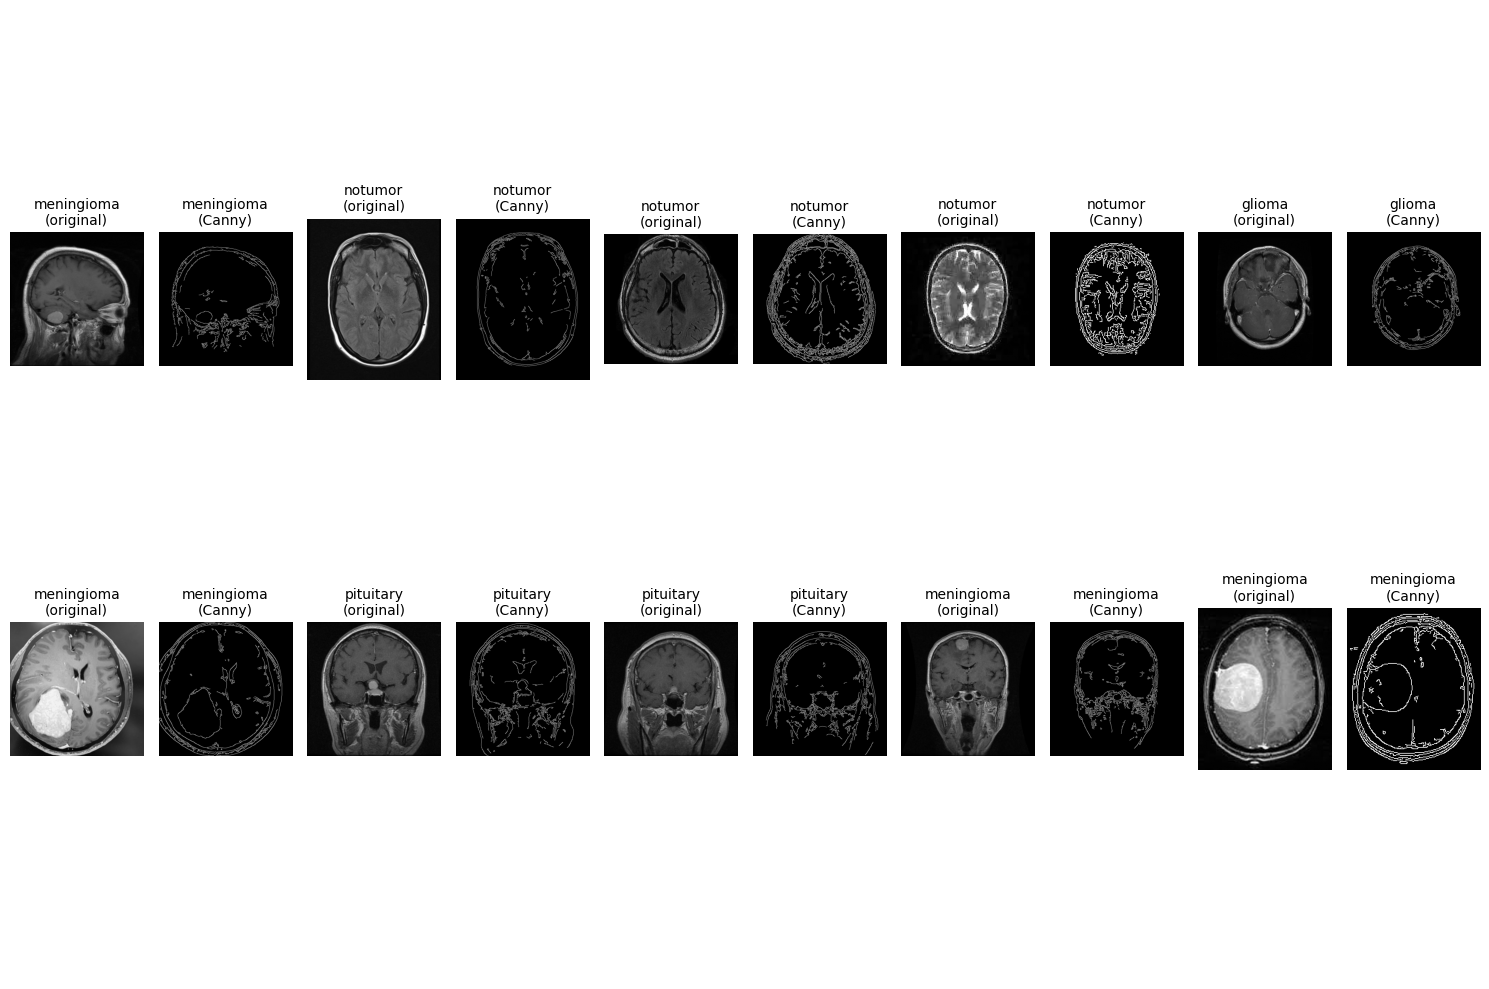

In [12]:
plt.figure(figsize=(15, 10))
plt.axis('off')
random_indices = np.random.choice(len(X_train), 10, replace=False)

for i, index in enumerate(random_indices):
  image = X_train[index]
  label = Y_train[index]

  # Convert to grayscale if not already
  if len(image.shape) == 3:
      image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

  # Apply Canny edge detection
  canny_image = cv.Canny(image, 100, 200)  # You may need to tune the thresholds

  plt.subplot(2, 10, i + i + 1)
  plt.title(f'{label}\n(original)', fontsize=10)
  plt.axis('off')
  plt.imshow(image, cmap="gray")
  plt.subplot(2, 10, i + i + 2)
  plt.title(f'{label}\n(Canny)', fontsize=10)
  plt.axis('off')
  plt.imshow(canny_image, cmap="gray")

plt.tight_layout()
plt.show()